In [85]:
from __future__ import division
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib import pyplot

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# load dataset
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_validation = pd.read_csv("validation.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430981 entries, 0 to 2430980
Data columns (total 25 columns):
click             int64
weekday           int64
hour              int64
bidid             object
userid            object
useragent         object
IP                object
region            int64
city              int64
adexchange        object
domain            object
url               object
urlid             object
slotid            object
slotwidth         int64
slotheight        int64
slotvisibility    object
slotformat        object
slotprice         int64
creative          object
bidprice          int64
payprice          int64
keypage           object
advertiser        int64
usertag           object
dtypes: int64(11), object(14)
memory usage: 463.7+ MB


In [4]:
#feature match- train set
labelencoder_X_1 = LabelEncoder()
df_train.useragent = labelencoder_X_1.fit_transform(df_train.useragent)
labelencoder_X_2 = LabelEncoder()
df_train.slotvisibility = labelencoder_X_2.fit_transform(df_train.slotvisibility)
labelencoder_X_3 = LabelEncoder()
df_train.slotformat = labelencoder_X_3.fit_transform(df_train.slotformat)
labelencoder_X_4 = LabelEncoder()
df_train.usertag = labelencoder_X_1.fit_transform(df_train.usertag)

In [5]:
#feature match-test set
df_test.useragent = labelencoder_X_1.fit_transform(df_test.useragent)
df_test.slotvisibility = labelencoder_X_2.fit_transform(df_test.slotvisibility)
df_test.slotformat = labelencoder_X_3.fit_transform(df_test.slotformat)
df_test.usertag = labelencoder_X_1.fit_transform(df_test.usertag)

#feature match-validation set
df_validation.useragent = labelencoder_X_1.fit_transform(df_validation.useragent)
df_validation.slotvisibility = labelencoder_X_2.fit_transform(df_validation.slotvisibility)
df_validation.slotformat = labelencoder_X_3.fit_transform(df_validation.slotformat)
df_validation.usertag = labelencoder_X_1.fit_transform(df_validation.usertag)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430981 entries, 0 to 2430980
Data columns (total 25 columns):
click             int64
weekday           int64
hour              int64
bidid             object
userid            object
useragent         int64
IP                object
region            int64
city              int64
adexchange        object
domain            object
url               object
urlid             object
slotid            object
slotwidth         int64
slotheight        int64
slotvisibility    int64
slotformat        int64
slotprice         int64
creative          object
bidprice          int64
payprice          int64
keypage           object
advertiser        int64
usertag           int64
dtypes: int64(15), object(10)
memory usage: 463.7+ MB


In [40]:
X_train = df_train[['weekday', 'hour','useragent','region','slotwidth','slotheight','slotvisibility', 'slotformat',"usertag"]]  # training dataset
y_train = df_train["click"]  # training label
X_test = df_test[['weekday', 'hour','useragent','region','slotwidth','slotheight','slotvisibility', 'slotformat',"usertag"]]  # testing dataset
X_validation = df_validation[['weekday', 'hour','useragent','region','slotwidth','slotheight','slotvisibility', 'slotformat',"usertag"]] # validation dataset
y_validation = df_validation["click"]

In [31]:
#sample
#train_sample = df_train.sample(frac=0.1, random_state = 2)
#X_train = train_sample[['weekday', 'hour','useragent','region','slotwidth','slotheight','slotvisibility', 'slotformat',"usertag"]]  # training dataset
#y_train = train_sample["click"]  # training label

In [41]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)

In [43]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss'},
    'num_leaves': 10,
    'num_trees': 20,
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.5,
    'bagging_freq': 10,
    'verbose': 0}

num_leaf = 10 

In [44]:
print('Start training...')
# train
gbm = lgb.train(params, lgb_train, num_boost_round=100,valid_sets=lgb_train)

Start training...


D:\Anaconda\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_logloss: 0.598416
[2]	training's binary_logloss: 0.52083
[3]	training's binary_logloss: 0.456142
[4]	training's binary_logloss: 0.40147
[5]	training's binary_logloss: 0.354773
[6]	training's binary_logloss: 0.314556
[7]	training's binary_logloss: 0.279684
[8]	training's binary_logloss: 0.249276
[9]	training's binary_logloss: 0.222637
[10]	training's binary_logloss: 0.199208
[11]	training's binary_logloss: 0.178536
[12]	training's binary_logloss: 0.160242
[13]	training's binary_logloss: 0.144013
[14]	training's binary_logloss: 0.129585
[15]	training's binary_logloss: 0.116736
[16]	training's binary_logloss: 0.105273
[17]	training's binary_logloss: 0.0950338
[18]	training's binary_logloss: 0.085875
[19]	training's binary_logloss: 0.0776752
[20]	training's binary_logloss: 0.0703264


In [22]:
print('Start predicting...')

Start predicting...


In [45]:
# predict and get data on leaves, training data
y_pred_train = gbm.predict(X_train,pred_leaf=True)

In [46]:
# feature transformation
print('Writing transformed training data')
transformed_training_matrix = np.zeros([len(y_pred_train),len(y_pred_train[0]) * num_leaf],dtype=np.int64)
for i in range(0,len(y_pred_train)):
    temp = np.arange(len(y_pred_train[0])) * num_leaf - 1 + np.array(y_pred_train[i])
    transformed_training_matrix[i][temp] += 1

Writing transformed training data


In [25]:
# predict and get data on leaves, testing data
y_pred_test = gbm.predict(X_test,pred_leaf=True)

In [26]:
# feature transformation and write result
print('Writing transformed testing data')
transformed_testing_matrix = np.zeros([len(y_pred_test),len(y_pred_test[0]) * num_leaf],dtype=np.int64)
for i in range(0,len(y_pred_test)):
    temp = np.arange(len(y_pred_test[0])) * num_leaf - 1 + np.array(y_pred_test[i])
    transformed_testing_matrix[i][temp] += 1

Writing transformed testing data


In [27]:
#predict and get data on leaves, valication data
y_pred_validation = gbm.predict(X_validation, pred_leaf = True)

In [28]:
# feature transformation
print('Writing transformed valication data')
transformed_validation_matrix = np.zeros([len(y_pred_validation),len(y_pred_validation[0]) * num_leaf],dtype=np.int64)
for i in range(0,len(y_pred_validation)):
    temp = np.arange(len(y_pred_validation[0])) * num_leaf - 1 + np.array(y_pred_validation[i])
    transformed_validation_matrix[i][temp] += 1

Writing transformed valication data


In [47]:
print('Calculate feature importances...')
# feature importances
print('Feature importances:', list(gbm.feature_importance()))
print('Feature importances:', list(gbm.feature_importance("gain")))

Calculate feature importances...
Feature importances: [6, 20, 33, 8, 18, 4, 19, 18, 54]
Feature importances: [14.821348041296005, 41.212521016597748, 131.85225331783295, 28.236856758594513, 26.874969303607941, 19.014273643493652, 78.409914970397949, 87.613746345043182, 233.91251078248024]


In [48]:
transformed_training_matrix.shape

(2430981, 200)

In [49]:
c = np.array([1,0.5,0.1,0.05,0.01,0.005,0.001])
for t in range(0,len(c)):
    lm = LogisticRegression(penalty='l2',C=c[t]) # logestic model construction
    lm.fit(transformed_training_matrix,y_train)  # fitting the data

    y_pred_train_label = lm.predict(transformed_training_matrix )  # For training data
    y_pred_test_label = lm.predict(transformed_testing_matrix)    # For testing data
    y_pred_validation_label = lm.predict(transformed_validation_matrix)    # For validation data
    y_pred_train_est = lm.predict_proba(transformed_training_matrix)   # Give the probabilty on each label
    y_pred_test_est = lm.predict_proba(transformed_testing_matrix)   # Give the probabilty on each label
    y_pred_validation_est = lm.predict_proba(transformed_validation_matrix)   # Give the probabilty on each label

MemoryError: 

In [39]:
print(y_pred_validation_est)

[[ 0.99654309  0.00345691]
 [ 0.99654309  0.00345691]
 [ 0.99654309  0.00345691]
 ..., 
 [ 0.99654309  0.00345691]
 [ 0.99654309  0.00345691]
 [ 0.99654309  0.00345691]]


In [66]:
result2 = pd.DataFrame(y_pred_validation_est)
result2.to_csv("GBDT result2.csv")

In [67]:
# calculate predict accuracy
num = 0
for i in range(0,len(y_pred_validation_label)):
    if y_validation[i] == y_pred_validation_label[i]:
        if y_train[i] == y_pred_train_label[i]:
            num += 1
print('penalty parameter is '+ str(c[t]))
print("prediction accuracy is " + str((num)/len(y_pred_validation_label)))

penalty parameter is 0.001
prediction accuracy is 0.9985720161223987


# predicting clicks

In [57]:
pre_test = pd.read_csv("GBDT result2.csv", sep=',')

In [51]:
len(pre_test)

303925

In [54]:
len(df_validation)

303925

In [58]:
#Select pCTR from outputs
pre_test.columns=['index','0','pCTR']
pre_test = pre_test['pCTR']
pre_test = pd.DataFrame(pre_test,columns=['pCTR'])

In [59]:
pre2 = pd.DataFrame(pre_test)
predCTR=pre2

In [60]:
len(predCTR)

303925

In [62]:
clicks = len(df_train[df_train.click==1])
impression = len(df_train[df_train.bidprice>df_train.payprice])
aCTR=clicks/impression
aCTR

0.0007383985358870749

In [67]:
def evaluate(bidprice):
    budget=6250000
    impression=0
    click=0
    for row in range(0,df_validation.shape[0]):
        if budget<df_validation.payprice[row]:
            continue
        if bidprice.iloc[row,0]>df_validation.payprice[row]:
            budget=budget-df_validation.payprice[row]
            impression=impression+1
            if df_validation.click[row]==1:
                click=click+1
    Cost = 6250000 - budget
    CTR = click/impression
    
    #CPM: Cost per mille 
    CPM = Cost/impression

    #eCPC: effective Cost per Click
    eCPC = Cost/clicks
    estimator = [click,impression,CTR,Cost,CPM,eCPC]
    #estimator = [click,Cost]
    return  estimator

In [64]:
#validation set
def bid_linear(basebid, pred_CTR,avg_CTR):
    bid = np.zeros((df_validation.shape[0], 1))
    for i in range (0,df_validation.shape[0]):
        bid[i,0] = basebid*pred_CTR.pCTR.iloc[i]/avg_CTR
    bid = pd.DataFrame(bid)
    return bid

In [65]:
#train set
def bid_linear2(basebid, pred_CTR,avg_CTR):
    bid = np.zeros((df_test.shape[0], 1))
    for i in range (0,df_test.shape[0]):
        bid[i,0] = basebid*pred_CTR.pCTR.iloc[i]/avg_CTR
    bid = pd.DataFrame(bid)
    return bid

In [ ]:
####Put base_bid range here to see clicks perfomance
for counter in np.arange(55,80):
    base_bid=counter
    bidprice=bid_linear(base_bid, predCTR, aCTR)
    estimator = evaluate(bidprice)
    print('basebid:',base_bid, 'click:',estimator[0], 'impression:',estimator[1],
         'CTR:%.5f'% estimator[2], 'cost:%.1f'% estimator[3], 'CPM:%.2f'% estimator[4], 'eCPC:%.2f'% estimator[5]) 

In [ ]:
result = bid_linear(79,predCTR, aCTR)
result.columns=['bidprice']
bidid = pd.DataFrame(test, columns=['bidid'])
final = pd.concat([bidid,result], axis=1)
final.head()

# Plotting

In [73]:
pre_test.head()

,pCTR
0,0.000588
1,0.000658
2,0.000588
3,0.000588
4,0.000658


In [74]:
pre_test["click 0 pro"] = 1 - pre_test["pCTR"]

In [75]:
pre_test.head()

,pCTR,click 0 pro
0,0.000588,0.999412
1,0.000658,0.999342
2,0.000588,0.999412
3,0.000588,0.999412
4,0.000658,0.999342


In [76]:
dval_predprob1 = pre_test["pCTR"]
dval_predprob0 = pre_test["click 0 pro"]

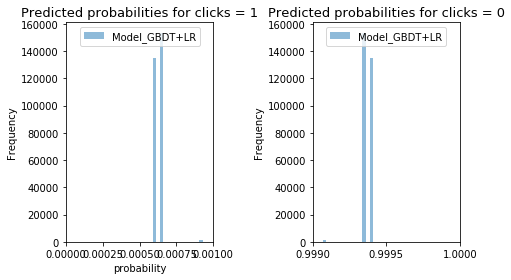

In [84]:
plt.figure(figsize = (7,4))

plt.subplot(121)

width = 0.6
pyplot.hist(dval_predprob1, bins = 1500, alpha=0.5, label='Model_GBDT+LR')
plt.xlabel('probability', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Predicted probabilities for clicks = 1', fontsize=13)
plt.xlim(0, 0.001)
#plot a line(plz change the value to suits)
plt.axvline(0.0042, color = 'grey', linestyle = '--', linewidth = 1)
pyplot.legend(loc='upper center')


plt.subplot(122)
width = 0.6
pyplot.hist(dval_predprob0, bins = 1500, alpha=0.5, label='Model_GBDT+LR')
plt.ylabel('Frequency', fontsize=10)
plt.title('Predicted probabilities for clicks = 0', fontsize=13)
plt.axvline(0.995, color = 'grey', linestyle = '--', linewidth = 1)
pyplot.legend(loc='upper center')
plt.xlim(0.999, 1.0)

plt.tight_layout()
plt.show()